In [1]:
# imports used in this assignment
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

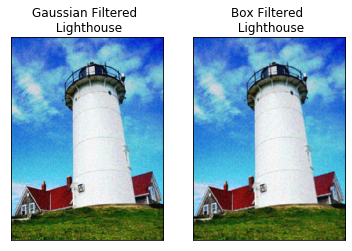

Gaussian Filter PSNR:  20.061
Box Filter PSNR:  19.722

The Guassian Filter offers the superior result when removing white noise.


In [2]:
# 2 - Denoising - White Noise Lighthouse

#load white noise image
image_path_wn = "./gaussian_lighthouse.png" 
lighthouse_wn = cv2.imread(image_path_wn)
lighthouse_wn = cv2.cvtColor(lighthouse_wn, cv2.COLOR_BGR2RGB)

#apply gaussian filter
filt_gauss_wn = cv2.GaussianBlur(lighthouse_wn, (5,5), 2)

#apply box filter
kernel = np.ones((5,5), np.float32)/(5*5)
filt_box_wn = cv2.filter2D(lighthouse_wn, -1, kernel)

#show filtered images
plt.subplot(121), plt.imshow(filt_gauss_wn)
plt.xticks([]), plt.yticks([]), plt.title('Gaussian Filtered \n Lighthouse')
plt.subplot(122), plt.imshow(filt_box_wn)
plt.xticks([]), plt.yticks([]), plt.title('Box Filtered \n Lighthouse')
plt.show()

#PSNR of filtered images
gauss_psnr_wn = cv2.PSNR(lighthouse_wn,filt_gauss_wn)
box_psnr_wn = cv2.PSNR(lighthouse_wn,filt_box_wn)

print('Gaussian Filter PSNR: ', "%.3f" % gauss_psnr_wn)
print('Box Filter PSNR: ', "%.3f" % box_psnr_wn)
print('')
if gauss_psnr_wn>box_psnr_wn:
    print('The Guassian Filter offers the superior result when removing white noise.')
else:
    print('The Box Filter offers the superior result when removing white noise.')



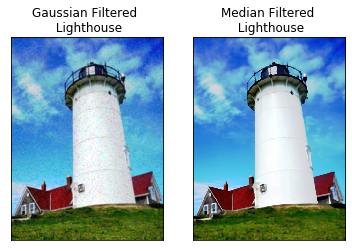

Gaussian Filter PSNR:  17.455
Median Filter PSNR:  17.122

The Guassian Filter offers the superior result when removing salt and pepper noise.


In [3]:
# 2 - Denoising - Salt and Pepper Noise Lighthouse

#load salt and pepper noise image
image_path_sp = "./saltandpepper_lighthouse.png" 
lighthouse_sp = cv2.imread(image_path_sp)
lighthouse_sp = cv2.cvtColor(lighthouse_sp, cv2.COLOR_BGR2RGB)

#apply gaussian filter
filt_gauss_sp = cv2.GaussianBlur(lighthouse_sp, (5,5), 2)

#apply median filter
filt_median_sp = cv2.medianBlur(lighthouse_sp, 5)

#show filtered images
plt.subplot(121), plt.imshow(filt_gauss_sp)
plt.xticks([]), plt.yticks([]), plt.title('Gaussian Filtered \n Lighthouse')
plt.subplot(122), plt.imshow(filt_median_sp)
plt.xticks([]), plt.yticks([]), plt.title('Median Filtered \n Lighthouse')
plt.show() 

#PSNR of filtered images
gauss_psnr_sp = cv2.PSNR(lighthouse_sp,filt_gauss_sp)
median_psnr_sp = cv2.PSNR(lighthouse_sp,filt_median_sp)

print('Gaussian Filter PSNR: ', "%.3f" % gauss_psnr_sp)
print('Median Filter PSNR: ',"%.3f" % median_psnr_sp)
print('')
if gauss_psnr_sp>median_psnr_sp:
    print('The Guassian Filter offers the superior result when removing salt and pepper noise.')
else:
    print('The Median Filter offers the superior result when removing salt and pepper noise.')

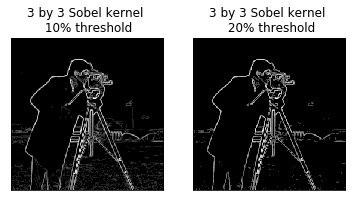

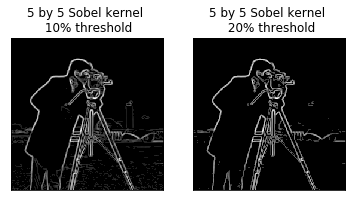

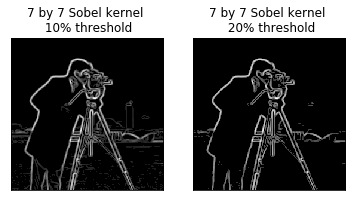

In [4]:
# 3 - Sobel Edge Detector - clean image

#load image
image_path_sb = "./cameraman.png" 
cameraman_sobel = cv2.imread(image_path_sb,cv2.IMREAD_GRAYSCALE)

# -- 3 by 3 kernel Sobel --
sb_3x = cv2.Sobel(cameraman_sobel,cv2.CV_64F,1,0,ksize=3)
sb_3y = cv2.Sobel(cameraman_sobel,cv2.CV_64F,0,1,ksize=3)
sb_3m = cv2.magnitude(sb_3x, sb_3y)

# determine maximum magnitude and apply 10% and 20% thresholding
max_3mag = np.max(sb_3m)
det,sb_3thresh1 = cv2.threshold(sb_3m,0.1*max_3mag,0,cv2.THRESH_TOZERO)
det,sb_3thresh2 = cv2.threshold(sb_3m,0.2*max_3mag,0,cv2.THRESH_TOZERO)

# show 3x3 kernel thresholded images
plt.subplot(121), plt.imshow(sb_3thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3 by 3 Sobel kernel \n 10% threshold')

plt.subplot(122),plt.imshow(sb_3thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3 by 3 Sobel kernel \n 20% threshold')
plt.show()


# -- 5 by 5 kernel Sobel --
sb_5x = cv2.Sobel(cameraman_sobel,cv2.CV_64F,1,0,ksize=5)
sb_5y = cv2.Sobel(cameraman_sobel,cv2.CV_64F,0,1,ksize=5)
sb_5m = cv2.magnitude(sb_5x, sb_5y)

# determine maximum magnitude and apply 10% and 20% thresholding
max_5mag = np.max(sb_5m)
det,sb_5thresh1 = cv2.threshold(sb_5m,0.1* max_5mag,0,cv2.THRESH_TOZERO)
det,sb_5thresh2 = cv2.threshold(sb_5m,0.2*max_5mag,0,cv2.THRESH_TOZERO)

#show 5x5 kernel thresholded images
plt.subplot(121), plt.imshow(sb_5thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('5 by 5 Sobel kernel \n 10% threshold')

plt.subplot(122),plt.imshow(sb_5thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('5 by 5 Sobel kernel \n 20% threshold')
plt.show()

# -- 7 by 7 kernel Sobel --
sb_7x = cv2.Sobel(cameraman_sobel,cv2.CV_64F,1,0,ksize=7)
sb_7y = cv2.Sobel(cameraman_sobel,cv2.CV_64F,0,1,ksize=7)
sb_7m = cv2.magnitude(sb_7x, sb_7y)

# determine maximum magnitude and apply 10% and 20% thresholding
max_7mag = np.max(sb_7m)
det,sb_7thresh1 = cv2.threshold(sb_7m,0.1*max_7mag,0,cv2.THRESH_TOZERO)
det,sb_7thresh2 = cv2.threshold(sb_7m,0.2*max_7mag,0,cv2.THRESH_TOZERO)

#show 7x7 kernel thresholded images
plt.subplot(121), plt.imshow(sb_7thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('7 by 7 Sobel kernel \n 10% threshold')

plt.subplot(122),plt.imshow(sb_7thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('7 by 7 Sobel kernel \n 20% threshold')
plt.show()

As the kernel size increases, the width of the detected edges increases. Larger kernel sizes also limit the amount of smaller edges being detected (such as on the ground next to the camera). 

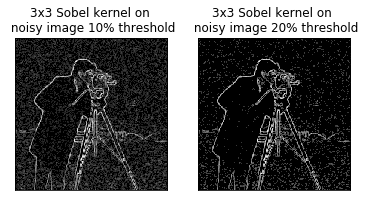

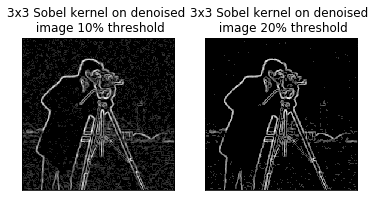

In [5]:
# 3 - Sobel Edge Detector - noisy image

# load image
image_path_sbg = "./gaussian_cameraman.png" 
gaussian_cameraman_sobel = cv2.imread(image_path_sbg,cv2.IMREAD_GRAYSCALE)

# -- 3 by 3 Sobel kernel - no denoising --
sb_gx = cv2.Sobel(gaussian_cameraman_sobel,cv2.CV_64F,1,0,ksize=3)
sb_gy = cv2.Sobel(gaussian_cameraman_sobel,cv2.CV_64F,0,1,ksize=3)
sb_gm = cv2.magnitude(sb_gx, sb_gy)

# determine maximum magnitude and apply 10% and 20% thresholding
max_gmag = np.max(sb_gm)
det,sb_gthresh1 = cv2.threshold(sb_gm,0.1*max_gmag,0,cv2.THRESH_TOZERO)
det,sb_gthresh2 = cv2.threshold(sb_gm,0.2*max_gmag,0,cv2.THRESH_TOZERO)

#show noisy thresholded images
plt.subplot(121), plt.imshow(sb_gthresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3x3 Sobel kernel on \n noisy image 10% threshold')

plt.subplot(122),plt.imshow(sb_gthresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3x3 Sobel kernel on \n noisy image 20% threshold')
plt.show()

# -- 3 by 3 Sobel kernel -  denoising with box filter before Sobel -- 

#box filter
kernel = np.ones((3,3), np.float32)/(3*3)
filt_sb = cv2.filter2D(gaussian_cameraman_sobel, -1, kernel)

# 3 by 3 Sobel kernel
sb_fx = cv2.Sobel(filt_sb,cv2.CV_64F,1,0,ksize=3)
sb_fy = cv2.Sobel(filt_sb,cv2.CV_64F,0,1,ksize=3)
sb_fm = cv2.magnitude(sb_fx, sb_fy)

# determine maximum magnitude and apply 10% and 20% thresholding
max_fmag = np.max(sb_fm)    
det,sb_fthresh1 = cv2.threshold(sb_fm,0.1*max_fmag,0,cv2.THRESH_TOZERO)
det,sb_fthresh2 = cv2.threshold(sb_fm,0.2*max_fmag,0,cv2.THRESH_TOZERO)

#show cleaned thresholded images
plt.subplot(121), plt.imshow(sb_fthresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3x3 Sobel kernel on denoised \n image 10% threshold')

plt.subplot(122),plt.imshow(sb_fthresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3x3 Sobel kernel on denoised \n image 20% threshold')
plt.show()

Gaussian noise leads to noisy edge detection using the Sobel method. This noise presents itself as "small" edges throughout the picture. By using a box filter to denoise the image prior to using the Sobel edge detector, the obtained edges are more clearly represented. The denoising seems most effective at removing false edges at the 20% thresholding value. 

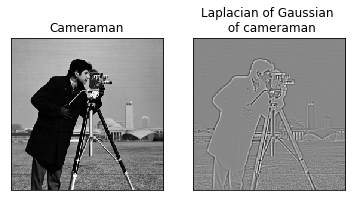

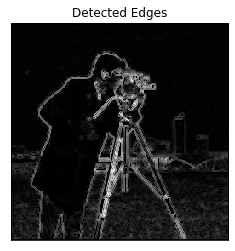

In [6]:
# 4 - Laplacian of Gaussian 

#load image
image_path_log = "./cameraman.png" 
cameraman_laplacian = cv2.imread(image_path_log,cv2.IMREAD_GRAYSCALE)

#apply laplacian
img_lap = cv2.Laplacian(cameraman_laplacian, cv2.CV_32F, ksize=5)

#show original and laplacian filtered image
plt.subplot(121), plt.imshow(cameraman_laplacian,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Cameraman')

plt.subplot(122), plt.imshow(img_lap,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Laplacian of Gaussian \n of cameraman')
plt.show()

#homemade edge detection
img_edge = copy.deepcopy(img_lap) #create new image for edges
height,width = img_lap.shape

#make image of edges black
for i in range(0,height):
    for j in range(0,width):
        img_edge[i,j]=0

# identify zero crossings (edges)
for i in range(1,height-1):
        for j in range(1,width-1):
            cnt_neg = 0
            cnt_pos = 0
            neighbouring_pixels = [img_lap[i+1, j-1],img_lap[i+1, j],img_lap[i+1, j+1],img_lap[i, j-1],\
                         img_lap[i, j+1],img_lap[i-1, j-1],img_lap[i-1, j],img_lap[i-1, j+1]]
            for pix in neighbouring_pixels:
                if pix>0:
                    cnt_pos = cnt_pos + 1
                elif pix<0:
                    cnt_neg = cnt_neg + 1
                    
            n_max = np.max(neighbouring_pixels)
            n_min = np.min(neighbouring_pixels)
            
            # If both negative and positive values exist in pixel neighbours --> zero crossing             
            # Change the neighbouring pixel with the max difference with (i,j) 
            if ((cnt_neg > 0) and (cnt_pos > 0)):
              if img_lap[i,j]>0:
                  img_edge[i, j] = img_lap[i,j] + np.abs(n_min)
              elif img_lap[i,j]<0 :
                  img_edge[i, j] = np.abs(img_lap[i,j]) + n_max

# show detected edges
plt.imshow(img_edge,cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Detected Edges')
plt.show()

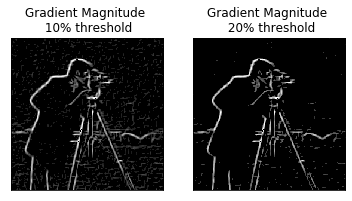

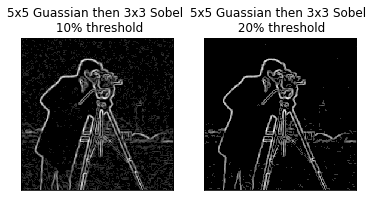

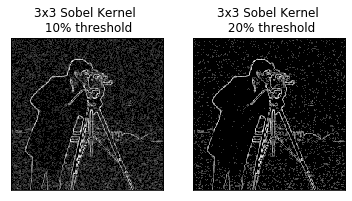

In [7]:
# 5 - Derivative of Gaussian

#load image
image_path_dg = "./gaussian_cameraman.png" 
cameraman_derivative = cv2.imread(image_path_dg,cv2.IMREAD_GRAYSCALE)

# -- derivative of gaussian
#create gaussian kernel
temp = cv2.getGaussianKernel(7,-1)
Gauss = np.outer( temp , temp.transpose())

#3 by 3 derivative of gaussian kernel
Gauss_x = cv2.Sobel(Gauss,cv2.CV_64F,1,0,ksize=3)
Gauss_y = cv2.Sobel(Gauss,cv2.CV_64F,0,1,ksize=3)

#apply kernel
img_x_derivative = cv2.filter2D(cameraman_derivative,-1,Gauss_x)
img_y_derivative = cv2.filter2D(cameraman_derivative,-1,Gauss_y)
img_magnitudes = copy.deepcopy(img_x_derivative) #create new image to save gradient magnitudes of each pixel
height,width = img_magnitudes.shape

#calculate gradient magnitude for each pixel
for i in range(0,height):
    for j in range(0,width):
        img_magnitudes[i,j] = np.sqrt((img_x_derivative[i,j]**2)+(img_y_derivative[i,j]**2))

# determine maximum magnitude and apply 10% and 20% thresholding
max_mag = np.max(img_magnitudes)
det,dg_thresh1 = cv2.threshold(img_magnitudes,0.1*max_mag,0,cv2.THRESH_TOZERO) 
det,dg_thresh2 = cv2.threshold(img_magnitudes,0.2*max_mag,0,cv2.THRESH_TOZERO)

# show thresholded images
plt.subplot(121), plt.imshow(dg_thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Gradient Magnitude \n 10% threshold')

plt.subplot(122),plt.imshow(dg_thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('Gradient Magnitude \n 20% threshold')
plt.show()


# -- 5 by 5 Gaussian Filter followed by 3 by 3 Sobel kernel --
gauss5 = cv2.GaussianBlur(cameraman_derivative, (5,5), 0)

dg_3x = cv2.Sobel(gauss5,cv2.CV_64F,1,0,ksize=3)
dg_3y = cv2.Sobel(gauss5,cv2.CV_64F,0,1,ksize=3)
dg_3m = cv2.magnitude(dg_3x, dg_3y)

# determine maximum magnitude and apply 10% and 20% thresholding
max_3mag = np.max(dg_3m)
det,dg_3thresh1 = cv2.threshold(dg_3m,0.1*max_3mag,0,cv2.THRESH_TOZERO)
det,dg_3thresh2 = cv2.threshold(dg_3m,0.2*max_3mag,0,cv2.THRESH_TOZERO)

#show thresholded images
plt.subplot(121), plt.imshow(dg_3thresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('5x5 Guassian then 3x3 Sobel \n 10% threshold')

plt.subplot(122),plt.imshow(dg_3thresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('5x5 Guassian then 3x3 Sobel \n 20% threshold')
plt.show()

# -- 3 by 3 Sobel kernel --
dg_x = cv2.Sobel(cameraman_derivative,cv2.CV_64F,1,0,ksize=3)
dg_y = cv2.Sobel(cameraman_derivative,cv2.CV_64F,0,1,ksize=3)
dg_m = cv2.magnitude(dg_x, dg_y)

# determine maximum magnitude and apply 10% and 20% thresholding
max_mag = np.max(dg_m)
det,dg_sthresh1 = cv2.threshold(dg_m,0.1*max_mag,0,cv2.THRESH_TOZERO)
det,dg_sthresh2 = cv2.threshold(dg_m,0.2*max_mag,0,cv2.THRESH_TOZERO)

#show thresholded images 
plt.subplot(121), plt.imshow(dg_sthresh1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3x3 Sobel Kernel \n 10% threshold')

plt.subplot(122),plt.imshow(dg_sthresh2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('3x3 Sobel Kernel \n 20% threshold')
plt.show()

The absence of denoising before applying a Sobel edge detector leads to less accurate (noisier) edge detection. The Sobel edge detector detects more edges than the derivative of gaussians method (notice the absence of an edge at the cameraman's coat). A larger threshold value allows for less noise, but may suppress some edges of interest, such as the background building detected on the denoised image by the Sobel edge detector thresholded at 10% but not visible when thresholded at 20%.

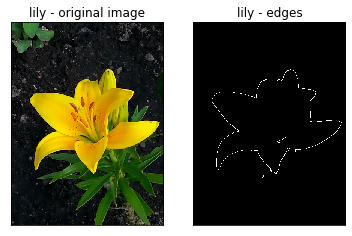

In [8]:
# 6 - Canny Edge Detection 

img_path_canny = "./yellowlily.png"
img_canny = cv2.imread(img_path_canny)
img_canny = cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB)

lily_edges = cv2.Canny(img_canny, 180, 1000, apertureSize=3)

plt.subplot(121), plt.imshow(img_canny)
plt.xticks([]), plt.yticks([])
plt.title('lily - original image')

plt.subplot(122), plt.imshow(lily_edges, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title('lily - edges')
plt.show()

The upper threshold seems to eliminate secondary edges, allowing for only the outline of the lily to be identified as edges. The lower the lower threshold, the more defined the edge of the lily. When using a larger kernel size, smaller edges are detected. Thus, the smaller the kernel size seems to detect the "main" edges, producing a cleaner image. 